#Recomendation system

In [1]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df= pd.read_csv("book.csv",encoding='latin-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [3]:

#for droping the unnamed column
df = df.drop(columns=[df.columns[df.columns.str.contains('^Unnamed')][0]])


In [4]:
df.head(10)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
7,276747,PLEADING GUILTY,9
8,276747,Under the Black Flag: The Romance and the Real...,9
9,276747,Where You'll Find Me: And Other Stories,8


In [42]:
# Renaming the column
df = df.rename({'User.ID':'UserId','Book.Title':'Title','Book.Rating':'Rating'}, axis=1)
df



,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [43]:
# Number of UserId ,Title and Ratings
df.nunique()

UserId    2182
Title     9659
Rating      10
dtype: int64

In [44]:
#checking the unique ids
len(df['UserId'].unique())


2182

In [45]:
df['UserId'].value_counts()


3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: UserId, Length: 2182, dtype: int64

In [46]:
df['Title'].value_counts()


Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Title, Length: 9659, dtype: int64

<Axes: ylabel='Frequency'>

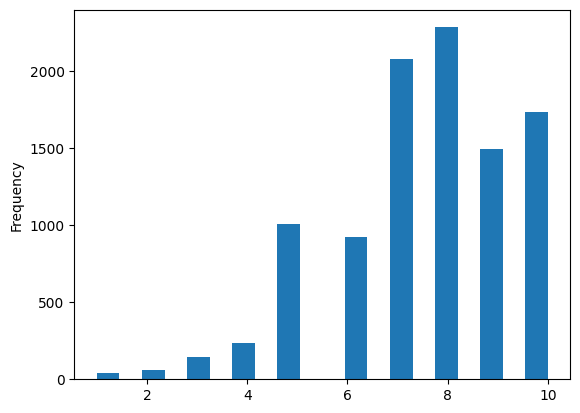

In [47]:
#checking rating wise bar plot
df['Rating'].plot.hist(bins=20)


In [48]:
#cheking hich books got 1 rating
df[df['Rating']==1]['Title'].unique()


array(['A Kiss Remembered', 'Children of the Night', 'Saucer',
       'Catechism of the Catholic Church',
       'Anam Cara : A Book of Celtic Wisdom', 'The Selfish Gene',
       "Having Our Say: The Delany Sisters' First 100 Years",
       'The Elements of Style, Fourth Edition',
       'How to Say It Style Guide', 'Fatal Care',
       'The Honk and Holler Opening Soon',
       'Cars and Trucks and Things That Go', 'American Gods: A Novel',
       'Welcome to the Funny Farm: The All-True Misadventures of a Woman on the Edge',
       'The Door into Summer', 'Selected Poems', 'Time and Chance',
       'Mrs. Mike', 'Upsetting the Balance (Worldwar Series, Volume 3)',
       'The Terrible Hours', 'Kiss of the Highlander',
       'Creative Abundance: Keys to Spiritual and Material Prosperity (Pocket Guide to Practical Spirituality)',
       'A Country Courtship (Zebra Regency Romance)',
       'Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)',
       'Eligible Bachelor (Silhouet

In [49]:
df[df['Rating']==8]['Title'].unique()


array(['Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
       "Where You'll Find Me: And Other Stories", 'Jane Doe', ...,
       'AT PARADISE GATE',
       'I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series)',
       'Twilight'], dtype=object)

In [50]:
df[df['Rating']==1]['Title'].value_counts()


A Kiss Remembered                                                                                         1
Clear Springs : A Family Story                                                                            1
Eligible Bachelor (Silhouette Romance)                                                                    1
At Wits End                                                                                               1
Justice (Peter Decker &amp; Rina Lazarus Novels (Paperback))                                              1
Buster Midnight's Cafe                                                                                    1
The Power of a Praying Parent                                                                             1
Great Human Race                                                                                          1
Aldo Applesauce                                                                                           1
The Milk Mustache Book: A Be

In [51]:
df[df['Rating']==8]['Title'].value_counts()


Stardust                                                              3
Fever Pitch                                                           2
1st to Die: A Novel                                                   2
Life Is Elsewhere                                                     2
Atonement                                                             2
                                                                     ..
You'Ve Lost Your Marbles, Lickety Spilt                               1
Precious Moments: What a Wonderful World (Golden Super Shape Book)    1
Alberta empfÃ?Â¤ngt einen Liebhaber. JubilÃ?Â¤ums- Edition.           1
Das letzte Konzert.                                                   1
Twilight                                                              1
Name: Title, Length: 2266, dtype: int64

In [52]:
#construct a pivot table where userid= as index, book names as column names and ratings as values
user_df=df.pivot_table(values= 'Rating', index= 'UserId', columns='Title')
user_df


Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [53]:

#filling the nan with 0

user_df= user_df.fillna(0)
user_df


Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [54]:
#checking the cosine similarities

from sklearn.metrics.pairwise import cosine_similarity

item_similarity= cosine_similarity(user_df)
item_similarity


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#the above line creat a value where er can understan that which user has the highest similarity
#by the values we can suggest the other peron the next book


In [55]:

item_similarity= pd.DataFrame(item_similarity)
item_similarity


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
item_similarity.index= df['UserId'].unique()
item_similarity.columns= df['UserId'].unique()

#for the above lines user id will be given in the column names and row  name
item_similarity.head()

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:

#replacing the digonal elements as 0

item_similarity.values[np.diag_indices_from(item_similarity)]=0
item_similarity.head()



,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#checking the max values with column
#check the userids whose have the have the highest similarites


In [58]:
item_similarity.idxmax(axis=1)


276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [59]:
#checking the  similarites btw 2 userids

df[(df['UserId']==162129) | (df['UserId']==276726)]


,UserId,Title,Rating
0,276726,Classical Mythology,5
9999,162129,Kids Say the Darndest Things,6


In [60]:
# extract the books which userId 276813 has watched
id1=df[df['UserId']==276726]
id1

,UserId,Title,Rating
0,276726,Classical Mythology,5


In [61]:
id1=df[df['UserId']==162121]
id1

,UserId,Title,Rating
9990,162121,The Cloister Walk,7
9991,162121,Open Water,5
9992,162121,The Evolution of Jane,8
9993,162121,AT PARADISE GATE,8
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [62]:
# extract the books which userId 8 has watched
id2=df[df['UserId']==8]
id2

,UserId,Title,Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7


In [63]:
# extract the books which userId 276813 & 8 have watched
df[(df['UserId']==276813) | (df['UserId']==8)]

,UserId,Title,Rating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5


In [64]:
id1.Title

9990                                    The Cloister Walk
9991                                           Open Water
9992                                The Evolution of Jane
9993                                     AT PARADISE GATE
9994    I Should Have Stayed Home: The Worst Trips of ...
9995         American Fried: Adventures of a Happy Eater.
9996                                Cannibal In Manhattan
9997                      How to Flirt: A Practical Guide
9998                                             Twilight
Name: Title, dtype: object

In [65]:
id2.Title

2399                              Ancient Celtic Romances
2400    The Western way: A practical guide to the West...
2401                                                Wings
2402                                             Truckers
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
2405                                    The Art Of Celtia
Name: Title, dtype: object

In [67]:
#margingf id1 and id2
pd.merge(id1,id2, on= 'Title', how='outer')

,UserId_x,Title,Rating_x,UserId_y,Rating_y
0,162121.0,The Cloister Walk,7.0,NaN,NaN
1,162121.0,Open Water,5.0,NaN,NaN
2,162121.0,The Evolution of Jane,8.0,NaN,NaN
3,162121.0,AT PARADISE GATE,8.0,NaN,NaN
4,162121.0,I Should Have Stayed Home: The Worst Trips of ...,8.0,NaN,NaN
5,162121.0,American Fried: Adventures of a Happy Eater.,7.0,NaN,NaN
6,162121.0,Cannibal In Manhattan,9.0,NaN,NaN
7,162121.0,How to Flirt: A Practical Guide,7.0,NaN,NaN
8,162121.0,Twilight,8.0,NaN,NaN
9,NaN,Ancient Celtic Romances,NaN,8.0,5.0


In [70]:
#recomendation
def get_recommendation(customer_id):

        tem=list(item_similarity.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(df[df['UserId'].isin(tem)]['Title'])

        recommended_books = set(book_list)-set(df[df['UserId']==customer_id]['Title'])

        return recommended_books

In [71]:
get_recommendation(162113)

{'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients',
 'Cinnamon (Shooting Stars)',
 'Classical Mythology',
 'Home Song',
 'Spring Fancy',
 'Surrender',
 'Surrender to Love (Avon Historical Romance)',
 "The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"}

In [72]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'The Apprentice',
 'The Seventh Night'}

In [73]:
get_recommendation(276726)

{'A Man of Steel', 'The Apprentice', 'The Seventh Night'}

#This is the we can do this process
